In [54]:
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
import math
import statistics


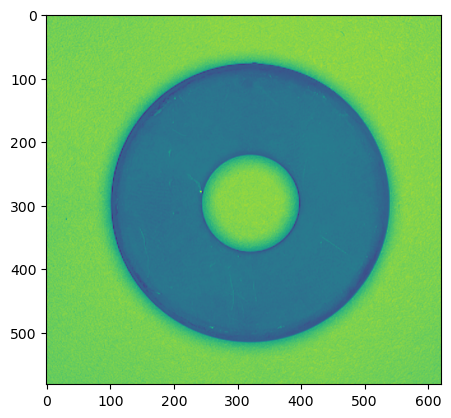

In [55]:
img=cv2.imread("C://Users//krvas//Desktop//tst_image_resize.png")
#plt.imshow(img)
img_grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_grey)


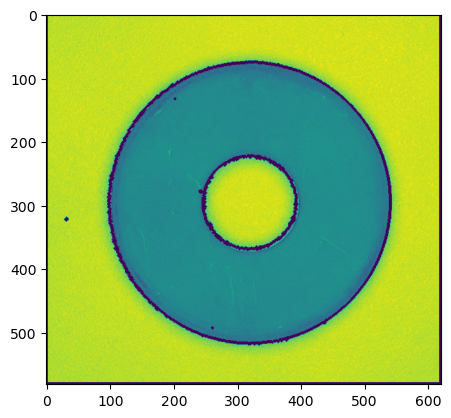

In [56]:
_,thresh1 = cv2.threshold(img_grey, 150, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
con_img=cv2.drawContours(img_grey, contours, -1, (0,0,255), 4)
plt.imshow(con_img)

In [57]:
contour_areas = [cv2.contourArea(contour) for contour in contours]

# Display areas
for i, area in enumerate(contour_areas):
    print(f"Contour {i + 1}: Area = {area}")

Contour 1: Area = 359020.0
Contour 2: Area = 2.0
Contour 3: Area = 2.0
Contour 4: Area = 4.0
Contour 5: Area = 2.0
Contour 6: Area = 5.5
Contour 7: Area = 2.0
Contour 8: Area = 2.0
Contour 9: Area = 2.0
Contour 10: Area = 2.0
Contour 11: Area = 7.0
Contour 12: Area = 2.0
Contour 13: Area = 2.0
Contour 14: Area = 5.5
Contour 15: Area = 2.0
Contour 16: Area = 2.0
Contour 17: Area = 2.0
Contour 18: Area = 2.0
Contour 19: Area = 2.0
Contour 20: Area = 2.0
Contour 21: Area = 152625.5
Contour 22: Area = 0.5
Contour 23: Area = 0.0
Contour 24: Area = 0.5
Contour 25: Area = 0.0
Contour 26: Area = 0.0
Contour 27: Area = 0.0
Contour 28: Area = 6.5
Contour 29: Area = 0.0
Contour 30: Area = 16734.0
Contour 31: Area = 5.5
Contour 32: Area = 8.5
Contour 33: Area = 5.5
Contour 34: Area = 11.0
Contour 35: Area = 6.0
Contour 36: Area = 4.0
Contour 37: Area = 2.0
Contour 38: Area = 2.0
Contour 39: Area = 2.0
Contour 40: Area = 2.0
Contour 41: Area = 2.0
Contour 42: Area = 2.0
Contour 43: Area = 9.0
Conto

for the contour area fxn we get around 60 contour area, out of which (contour_area_21 : 152625 pixel sq.) is the outer circle and (contour_area_30: 16734 pixel sq) is inner circle

836
333


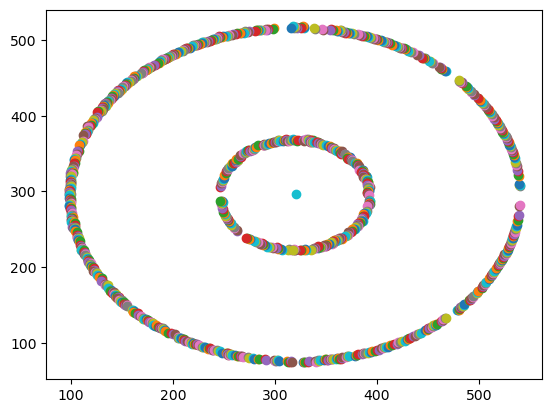

In [58]:
#for inner and outer circle
for contour in contours:
    area = cv2.contourArea(contour)
    #for inner circle area is around 16734 sq pixel
    if 15000<area < 17000:
        print(len(contour))             
        (x,y),mn_radius = cv2.minEnclosingCircle(contour)
        for i in contour:
            plt.scatter(i[0][0],i[0][1])
    #for outer circle area is around 152625 sq pixel
    elif 100000 < area < 200000:
        print(len(contour))
        (x,y),mn_radius = cv2.minEnclosingCircle(contour)
        for i in contour:
            plt.scatter(i[0][0],i[0][1])


      
plt.scatter(x,y) 

for finding variation of radius wrt angle

In [59]:
for contour in contours:
    area = cv2.contourArea(contour)
    if 15000<area < 17000:
         
        con = np.array(contour)
        points = con.reshape(-1, 2) 
        inner_points_list = points.tolist() 
        
    elif 100000 < area < 200000:
        con = np.array(contour)
        points = con.reshape(-1, 2) 
        outer_points_list = points.tolist() 
        

        
centre = [x,y]
inner_rad = [math.dist(point,centre) for point in inner_points_list]
outer_rad = [math.dist(point,centre) for point in outer_points_list]


In [60]:
inner_avg_rad=statistics.mean(inner_rad)
inner_avg_rad *= 0.09
in_err=(inner_avg_rad-6)/(6)


print("The radius of inner circle found through plotting the contours is : ",inner_avg_rad)
print("The actual geomentric radius is: 6mm")
print("The error is around ",int(in_err*100),"%")


The radius of inner circle found through plotting the contours is :  6.554673640894931
The actual geomentric radius is: 6mm
The error is around  9 %


In [61]:
outter_avg_rad=statistics.mean(outer_rad)
outter_avg_rad *=0.09
out_err = (outter_avg_rad-20)/(20)

print("The radius of inner circle found through plotting the contours is : ",outter_avg_rad)
print("The actual geomentric radius is: 20mm")
print("The error is around ",round(out_err*100,3),"%")

The radius of inner circle found through plotting the contours is :  19.848448976791317
The actual geomentric radius is: 20mm
The error is around  -0.758 %


333


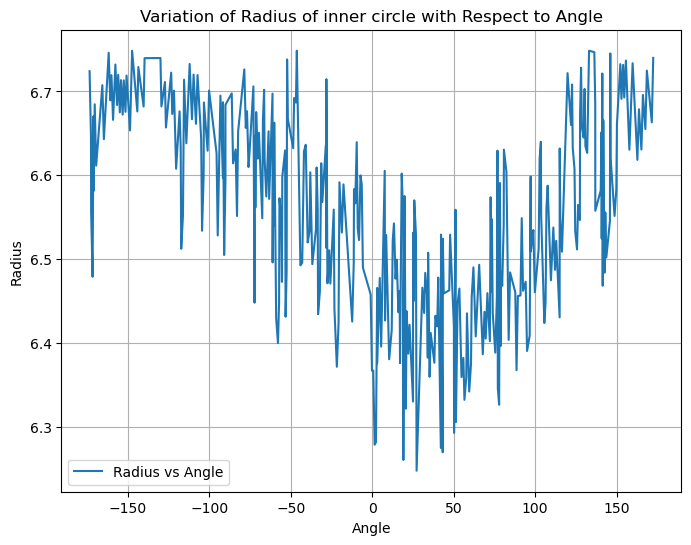

In [62]:

# atan2 function takes postive x-axis as reference axis and center[x,y] as reference point and calculate the angle of contour points wrt centre
in_angles = [math.atan2(point[1] - centre[1], point[0] - centre[0]) for point in inner_points_list]
in_angles = np.array(in_angles)  # Convert to NumPy array for easier manipulation

#Sort angles and corresponding radii
in_sorted_indices = np.argsort(in_angles)
print(len(in_sorted_indices))
in_sorted_angles = in_angles[in_sorted_indices]
in_sorted_radii = np.array(inner_rad)[in_sorted_indices]
in_sorted_angles = np.degrees(in_sorted_angles)
in_sorted_radii = in_sorted_radii * 0.09
#print(sorted_angles)

# Plot the variation of radius with respect to angle
plt.figure(figsize=(8, 6))
plt.plot(in_sorted_angles, in_sorted_radii, label="Radius vs Angle")
plt.xlabel("Angle")
plt.ylabel("Radius")
plt.title("Variation of Radius of inner circle with Respect to Angle")
plt.legend()
plt.grid()
plt.show()



836


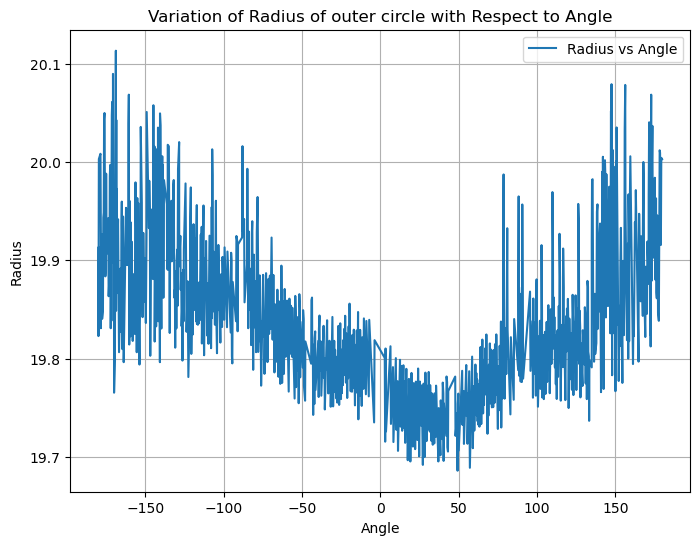

In [63]:

# atan2 function takes postive x-axis as reference axis and center[x,y] as reference point and calculate the angle of contour points wrt centre
out_angles = [math.atan2(point[1] - centre[1], point[0] - centre[0]) for point in outer_points_list]
out_angles = np.array(out_angles)  # Convert to NumPy array for easier manipulation

#Sort angles and corresponding radii
out_sorted_indices = np.argsort(out_angles)
print(len(out_sorted_indices))
out_sorted_angles = out_angles[out_sorted_indices]
out_sorted_radii = np.array(outer_rad)[out_sorted_indices]
out_sorted_angles = np.degrees(out_sorted_angles)
out_sorted_radii = out_sorted_radii * 0.09
#print(sorted_angles)

# Plot the variation of radius with respect to angle
plt.figure(figsize=(8, 6))
plt.plot(out_sorted_angles, out_sorted_radii, label="Radius vs Angle")
plt.xlabel("Angle")
plt.ylabel("Radius")
plt.title("Variation of Radius of outer circle with Respect to Angle")
plt.legend()
plt.grid()
plt.show()

